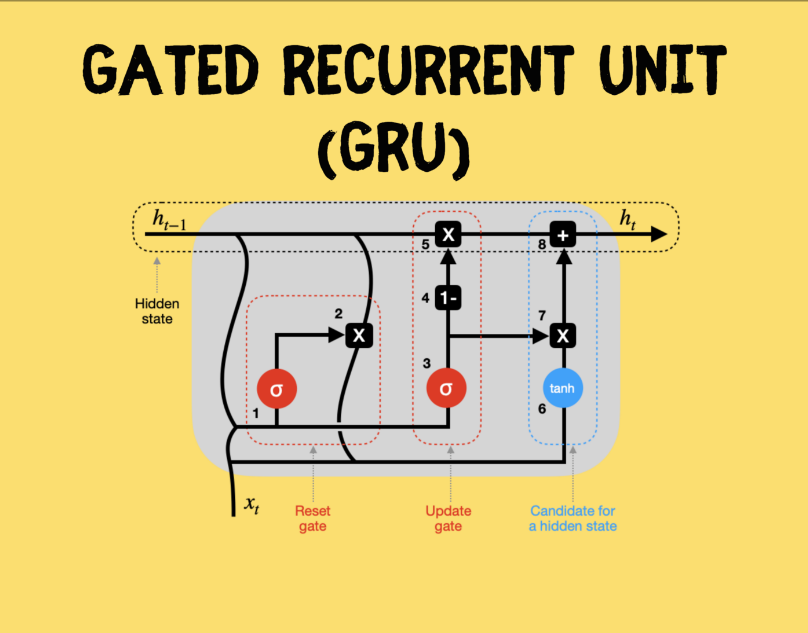

# NLP with DL

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.text import Tokenizer # This is for create tokens.
from tensorflow.keras.preprocessing.sequence import pad_sequences # This is for create same size sequences with padding.

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/HepsiBurada/hepsiburada.csv')
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
df.Rating.value_counts()

1    229821
0     13676
Name: Rating, dtype: int64

In [ ]:
df.Rating = df.Rating.map({1:0, 0:1}) # We want to find all negative comments so if negatives comments be 1, it will be better.

In [ ]:
df.Rating.value_counts() # We should use class_weight.compute_sample_weight(class_weight = 'balanced', y = y_train) later.

0    229821
1     13676
Name: Rating, dtype: int64

In [ ]:
df.Rating.value_counts(normalize = True)

0    0.943835
1    0.056165
Name: Rating, dtype: float64

## Tokenization

In [ ]:
X = df['Review'].values # Arrays works faster so we should change it to arrays via .values
y = df['Rating'].values

In [ ]:
num_words = 15000 # We don't need that but first 15k tokens is enough.

tokenizer = Tokenizer(num_words = num_words) # We will take the first 15,000 words (tokens) that are used the most in corpus and ignore the rest. # If the value is set to None, all words are taken into account.
                                             # filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'   --> Like stemming or lemmatization. Text preprocessing with filters parameter.
                                             # It also do automatic .lower() all words.

In [ ]:
tokenizer.fit_on_texts(X) # We don't do stemming or lemmatization on DL. If we want smth like this, we can use filters parameter above.

## Creating Word Index

In [ ]:
tokenizer.word_index # Most used 15k words.

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [ ]:
len(tokenizer.word_index) # 217k token but we will use only first 15k

217983

## Converting tokens to numeric

In [ ]:
tokenizer.texts_to_sequences(X) # This is essential part before go to modelling. We need to create sequences with our tokenizer.

[[52, 462, 1617, 4510],
 [52, 462, 55, 584],
 [4,
  234,
  29,
  150,
  1,
  76,
  3717,
  1698,
  274,
  82,
  4689,
  10517,
  77,
  187,
  295,
  2020,
  8,
  262,
  5957,
  433,
  1,
  7,
  280,
  1041,
  8857,
  11,
  648,
  78,
  1221,
  225,
  23,
  5,
  1763,
  1,
  1568,
  64,
  68,
  1,
  6,
  5,
  1754,
  893,
  127,
  288,
  1348,
  119,
  20,
  3684,
  5028,
  31,
  172,
  4077,
  4859,
  1930,
  9977,
  25,
  8329,
  3,
  5,
  9977,
  57,
  1696,
  174,
  595,
  16,
  1816],
 [343, 253, 97, 11641, 33, 2623, 55],
 [494, 1, 1, 6, 1350, 53],
 [14, 7],
 [1, 24, 2, 4, 3, 67, 13, 22, 72, 3480, 917, 17, 3, 1, 81],
 [164, 65, 1049, 55, 2075, 13779, 149, 6989, 4510, 65, 339, 11, 1855, 99, 178],
 [4,
  494,
  208,
  8,
  1,
  22,
  771,
  330,
  38,
  186,
  262,
  18,
  367,
  1863,
  3,
  494,
  208,
  8,
  995,
  587,
  651,
  176,
  1147,
  11148,
  65,
  184,
  164,
  250,
  85,
  389,
  26,
  192,
  1856,
  262,
  884,
  34],
 [19,
  2,
  921,
  7547,
  4954,
  160,
  23,
  5

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
X[105]

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [ ]:
X_num_tokens[105]

[1816,
 5360,
 131,
 23,
 1,
 1849,
 74,
 12,
 118,
 1533,
 297,
 745,
 3216,
 13402,
 6326,
 5030,
 2463,
 113,
 2534,
 8858,
 4,
 143]

In [ ]:
print(len(X_num_tokens[105]))
print(len(X_num_tokens[106]))
len(X_num_tokens[6150])

22
18


88

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([ 4,  4, 66, ...,  4, 10, 38])

## Maximum number of tokens for all documents

In [ ]:
num_tokens.mean()

21.36101060793357

In [ ]:
num_tokens.max()

298

In [ ]:
num_tokens.argmax()

21941

In [ ]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [ ]:
len(X_num_tokens[21941])

298

In [ ]:
liste = [5, 10, 8, 9, 12, 15]

print(np.array(liste) < 10)
print(sum(np.array(liste) < 10))
print(sum(np.array(liste) < 10) / len(liste)) # Ratio

[ True False  True  True False False]
3
0.5


In [ ]:
max_tokens = 61 # This is the ideal token size.

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens) # %95 are less than 61 length.

0.9598968365113328

In [ ]:
sum(num_tokens < max_tokens)

233732

In [ ]:
len(num_tokens)

243497

## Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [ ]:
X_pad.shape

(243497, 61)

In [ ]:
np.array(X_num_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [ ]:
X_pad[800] # When the sentences is less than maxlen, it padding around to 0.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10], dtype=int32)

In [ ]:
np.array(X_num_tokens[21941])

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [ ]:
X_pad[21941] # When the sentences are more than maxlen. It took only last maxlen.

array([ 872, 3501,  537, 1804,  488, 2218,   75,  163,    2,  456,   13,
       1308, 1865, 3432,    5,  824, 7798,  836, 1640, 7838, 3344,   12,
       1308,   31, 3063,  299, 2704,  851, 1052,   39, 1490, 3436,  317,
       1170,   75,  537,   50,  327,  246, 1322,  120,    2, 3436, 7527,
        199,  260,  579, 6176, 1800,   13,   45,  808,  108,    3,  865,
        749, 5840,   50,  106,   76,  879], dtype=int32)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_pad, y , test_size = 0.2 , stratify = y , random_state = 53)

## Modelling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 50

In [ ]:
# num_words

In [ ]:
# embedding_size

In [ ]:
# max_tokens

In [ ]:
model.add(Embedding(input_dim = num_words, # Take first 15k tokens.
                    output_dim = embedding_size, # Like vector size.
                    input_length = max_tokens)) # An input token size.

model.add(Dropout(0.2)) # output_dim drop outed.

model.add(GRU(units = 48 , return_sequences = True)) # return_sequences is important for remembering and transferring after hidden layer. # You also use LSTM rather than GRU.
model.add(Dropout(0.2))
# model.add(BatchNormalization())

# model.add(GRU(units = 32, return_sequences = True))
# model.add(Dropout(0.5))

# model.add(GRU(units = 16, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(GRU(units = 16))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = Adam(learning_rate = 0.01)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [ ]:
model.summary() 

# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 50)            750000    
                                                                 
 dropout (Dropout)           (None, 61, 50)            0         
                                                                 
 gru (GRU)                   (None, 61, 48)            14400     
                                                                 
 dropout_1 (Dropout)         (None, 61, 48)            0         
                                                                 
 gru_1 (GRU)                 (None, 16)                3168      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 767,585
Trainable params: 767,585
Non-trai

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", 
                           verbose = 1, patience = 3, restore_best_weights = True)

In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(class_weight = 'balanced', y = y_train) # We need to use class_weight. Because too imbalance data.
pd.Series(classes_weights)

0         0.529754
1         0.529754
2         0.529754
3         0.529754
4         0.529754
            ...   
194792    0.529754
194793    0.529754
194794    0.529754
194795    0.529754
194796    0.529754
Length: 194797, dtype: float64

In [ ]:
pd.Series(classes_weights).unique() # We should use this classes_weights at fitting.

array([0.52975426, 8.90215702])

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 256 , sample_weight = classes_weights,
         validation_data = (X_test, y_test), callbacks = [early_stop] , verbose = 2)

Epoch 1/10
761/761 - 12s - loss: 0.3259 - recall: 0.8609 - val_loss: 0.2526 - val_recall: 0.8834 - 12s/epoch - 16ms/step
Epoch 2/10
761/761 - 7s - loss: 0.1987 - recall: 0.9259 - val_loss: 0.2193 - val_recall: 0.8742 - 7s/epoch - 9ms/step
Epoch 3/10
761/761 - 7s - loss: 0.1555 - recall: 0.9472 - val_loss: 0.2058 - val_recall: 0.8336 - 7s/epoch - 9ms/step
Epoch 4/10
Restoring model weights from the end of the best epoch: 1.
761/761 - 7s - loss: 0.1389 - recall: 0.9552 - val_loss: 0.1788 - val_recall: 0.7905 - 7s/epoch - 9ms/step
Epoch 4: early stopping


In [ ]:
model.save('review_hepsiburada-recall-1.h5')

## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.325897,0.860890,0.252612,0.883364
1,0.198718,0.925875,0.219267,0.874223
2,0.155463,0.947171,0.205758,0.833638
3,0.138864,0.955214,0.178750,0.790494


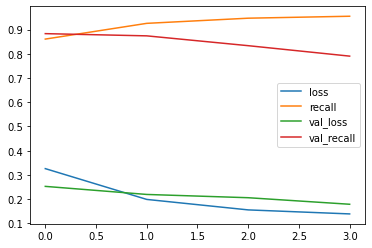

In [ ]:
model_loss.plot();

In [ ]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 26s 4ms/step - loss: 0.2366 - recall: 0.9543


[0.23662327229976654, 0.9543003439903259]

In [ ]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 7s 4ms/step - loss: 0.2526 - recall: 0.8834


[0.2526116967201233, 0.8833637833595276]

In [ ]:
model.predict(X_train)

6088/6088 [==============================] - 20s 3ms/step


array([[0.0158632 ],
       [0.15580092],
       [0.1313162 ],
       ...,
       [0.5855085 ],
       [0.03822177],
       [0.92002743]], dtype=float32)

In [ ]:
y_train[0]

0

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

6088/6088 [==============================] - 20s 3ms/step
[[165980  17876]
 [   500  10441]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    183856
           1       0.37      0.95      0.53     10941

    accuracy                           0.91    194797
   macro avg       0.68      0.93      0.74    194797
weighted avg       0.96      0.91      0.92    194797



In [ ]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

1522/1522 [==============================] - 5s 3ms/step
[[41248  4717]
 [  319  2416]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     45965
           1       0.34      0.88      0.49      2735

    accuracy                           0.90     48700
   macro avg       0.67      0.89      0.72     48700
weighted avg       0.96      0.90      0.92     48700



1522/1522 [==============================] - 5s 3ms/step


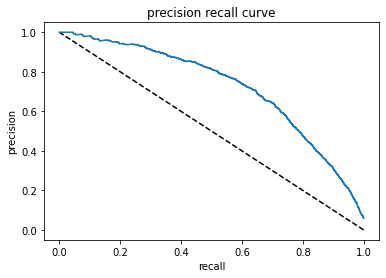

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.723629983144254

## Base model without sample weights

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Embedding(input_dim = num_words,
                    output_dim = embedding_size,
                    input_length = max_tokens))

model2.add(Dropout(0.5))

model2.add(GRU(units = 48, return_sequences = True))

model2.add(Dropout(0.5))

model2.add(GRU(units = 12))

model2.add(Dense(1, activation = 'sigmoid'))


optimizer = Adam(learning_rate = 0.001)


model2.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ['Recall'])


model2.fit(X_train, y_train, epochs = 5, batch_size = 128,
         validation_data = (X_test, y_test) , verbose = 2)

Epoch 1/5
1522/1522 - 18s - loss: 0.1300 - recall: 0.4081 - val_loss: 0.1013 - val_recall: 0.4815 - 18s/epoch - 12ms/step
Epoch 2/5
1522/1522 - 13s - loss: 0.0838 - recall: 0.6434 - val_loss: 0.0977 - val_recall: 0.5539 - 13s/epoch - 9ms/step
Epoch 3/5
1522/1522 - 13s - loss: 0.0703 - recall: 0.7104 - val_loss: 0.0926 - val_recall: 0.6062 - 13s/epoch - 9ms/step
Epoch 4/5
1522/1522 - 13s - loss: 0.0602 - recall: 0.7571 - val_loss: 0.1020 - val_recall: 0.6044 - 13s/epoch - 9ms/step
Epoch 5/5
1522/1522 - 13s - loss: 0.0524 - recall: 0.7935 - val_loss: 0.1126 - val_recall: 0.5759 - 13s/epoch - 9ms/step


## Scores without sample_weight

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model2.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred)) # This is too bad model without sample_weight.

6088/6088 [==============================] - 21s 3ms/step
[[183488    368]
 [  1832   9109]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    183856
           1       0.96      0.83      0.89     10941

    accuracy                           0.99    194797
   macro avg       0.98      0.92      0.94    194797
weighted avg       0.99      0.99      0.99    194797



In [ ]:
y_pred = model2.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred)) # This is too bad model without sample_weight.

1522/1522 [==============================] - 5s 3ms/step
[[45493   472]
 [ 1123  1612]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     45965
           1       0.77      0.59      0.67      2735

    accuracy                           0.97     48700
   macro avg       0.87      0.79      0.83     48700
weighted avg       0.96      0.97      0.97     48700



## Model Saving

In [ ]:
# model.save('review_hepsiburada.h5')

## Loading Model

In [ ]:
from tensorflow.keras.models import load_model

# model_review = load_model('review_hepsiburada.h5')

model3 = load_model('review_hepsiburada-4.h5')

## Predicton

In [ ]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen = max_tokens)
tokens_pad.shape

(14, 61)

In [ ]:
(model.predict(tokens_pad) > 0.5).astype("int")

1/1 [==============================] - 0s 19ms/step


array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
(model2.predict(tokens_pad) > 0.5).astype('int') # As we see this model works worse. sample_weight important !!!

In [ ]:
# Done !